<a href="https://colab.research.google.com/github/LiterallyRicky/DataScience-A2/blob/main/Copy_of_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.



---



**Task2**:

What is a decision tree? How do they work?

**Answer2:**

Essentially, a decision tree is a visualization that shows the possible outcomes of a certian situation. By drawing a decision tree, it's used to benefit on making better decisions by analyzing uncertain outcomes.



---



**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

**Answer3:**

The depth correlates with the amount of 'layers' a decision tree has. More layers means the our tree can capture more patterns in the data. There's not any regulations you need to follow but it's generally acceptable that if there's not too many data points in your model/sample, you don't need to add much depth, as it'll be overfitting. Adding more complexity could be bad for your model. Vice Versa - if you have multiple data points, it's a good idea to add more complexity or make the decision tree deeper.



---



**Task4:**

How are BART models similar and different from a decision tree?

**Answer4:**

BART and decision trees both use tree structures to model data, capturing nonlinear relationships and interactions. However, BART is a Bayesian ensemble method that averages multiple trees with multiple usages of sampling for uncertainty estimation, whereas a decision tree makes deterministic splits. Unlike a single decision tree, BART provides probabilistic predictions, making it more robust and resistant to overfitting.



---



**Task5**:

Why would we use a BART model instead of a decision tree?

**Answer5:**

BART is great for capturing multiple interactions within sampling and provides a great amount of uncertianty estimation. BARTs are more complex but still quite understandable as well as much more resistant to overfitting and capable of capturing more complex relationships in the data compared to a decision tree. I have a feeling that BART models have way more pros than a decision tree by itself.



---



## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [1]:
!pip install pymc-bart
!pip install preliz

  Using cached preliz-0.16.0-py3-none-any.whl.metadata (6.1 kB)
Using cached preliz-0.16.0-py3-none-any.whl (519 kB)


In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [3]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()
penguins

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex,year
0,Adelie,Torgersen,3.91,1.87,18.1,3.750,male,2007
1,Adelie,Torgersen,3.95,1.74,18.6,3.800,female,2007
2,Adelie,Torgersen,4.03,1.80,19.5,3.250,female,2007
4,Adelie,Torgersen,3.67,1.93,19.3,3.450,female,2007
5,Adelie,Torgersen,3.93,2.06,19.0,3.650,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,5.58,1.98,20.7,4.000,male,2009
340,Chinstrap,Dream,4.35,1.81,20.2,3.400,female,2009
341,Chinstrap,Dream,4.96,1.82,19.3,3.775,male,2009
342,Chinstrap,Dream,5.08,1.90,21.0,4.100,male,2009


In [19]:
X = penguins[['flipper_length', 'bill_depth', 'bill_length']]
Y = penguins['body_mass']

In [20]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',20) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y) #likelihood
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

In [21]:
pm.sample_posterior_predictive(idata_penguins,model_penguins, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

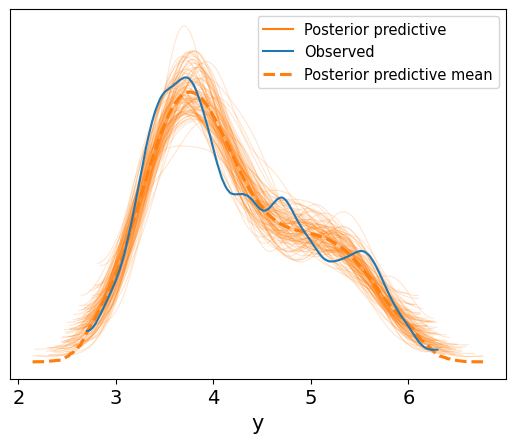

In [22]:
ax = az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])



---



**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

In [9]:
X1 = penguins["flipper_length"].to_numpy().reshape(-1, 1)
Y1 = penguins["body_mass"].to_numpy()

In [10]:
with pm.Model() as model_pens:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X1, np.log(Y1), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Normal("y", mu=μ, sigma=s, observed=Y1)
    idata_pens = pm.sample(compute_convergence_checks=False)

Output()

Output()

<Axes: xlabel='y'>

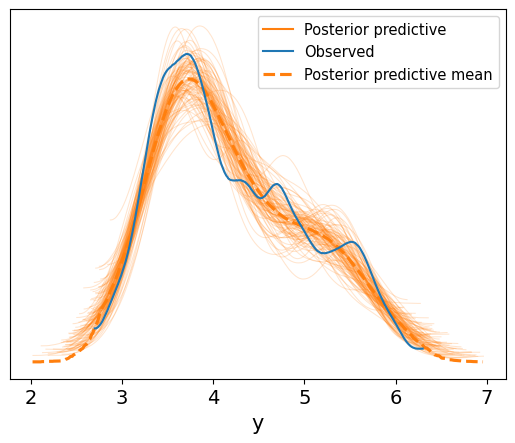

In [11]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_pens,model_pens, extend_inferencedata=True)
az.plot_ppc(idata_pens, num_pp_samples=100, colors=["C1", "C0", "C1"])

In [12]:
posterior_mean = idata_pens.posterior["μ"]

μ_hdi = az.hdi(ary=idata_pens, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_pens, group="posterior_predictive", var_names=["y"]
).T

/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


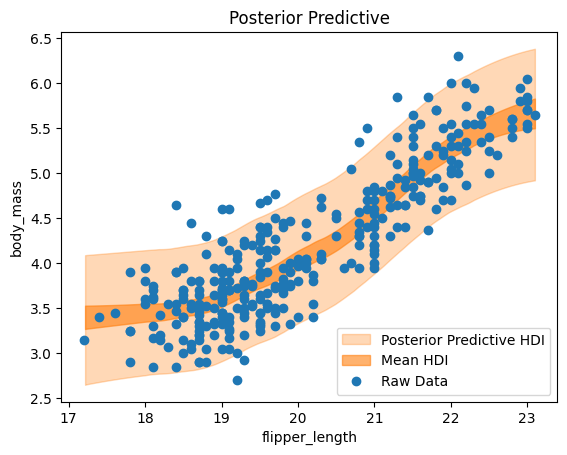

In [13]:
idx = np.argsort(X1[:, 0])
fig, ax = plt.subplots()

az.plot_hdi(
    x=X1[:, 0],
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive HDI"},
)

az.plot_hdi(
    x=X1[:, 0],
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);



---



**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

**Answer8:**

The plot above captures most of the raw data points and accurate displays the increasing slope.Especially, towards the middle. The middle of the model is very accurate since there's more data than the lower and higher points of the plot. However, some data points are not being captured, but the model is accurately showing the general trend.



---



**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

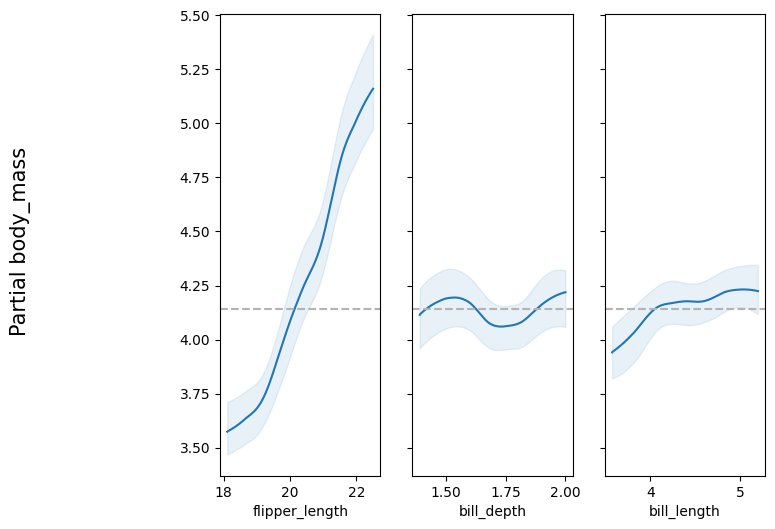

In [23]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

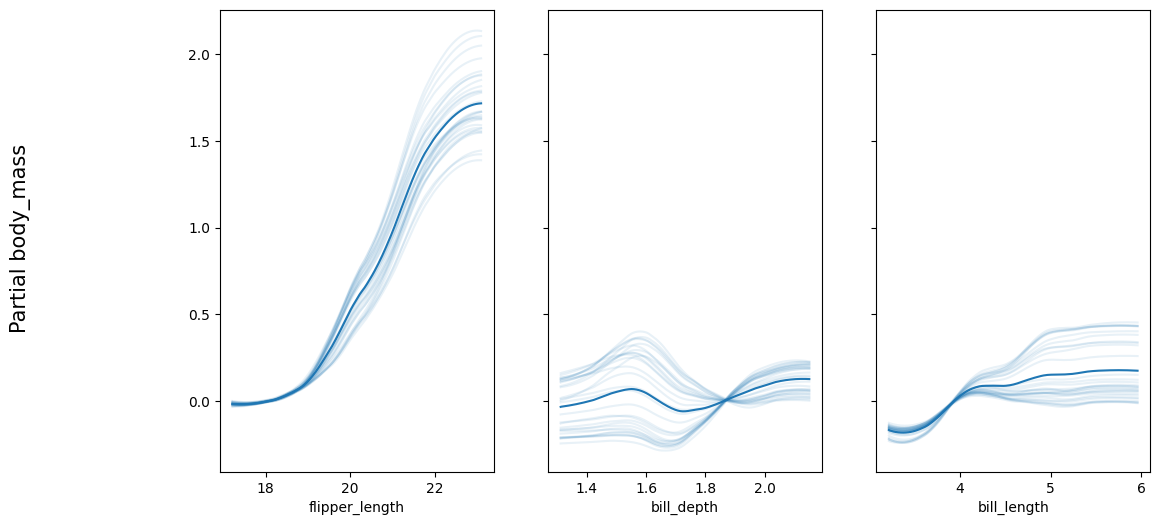

In [24]:
pmb.plot_ice( μ_, X, Y, grid=(1, 3), func=np.exp, figsize = (12,6))

In [25]:
vi_penguins = pmb.compute_variable_importance(idata_penguins, μ_, X)

<Axes: ylabel='R²'>

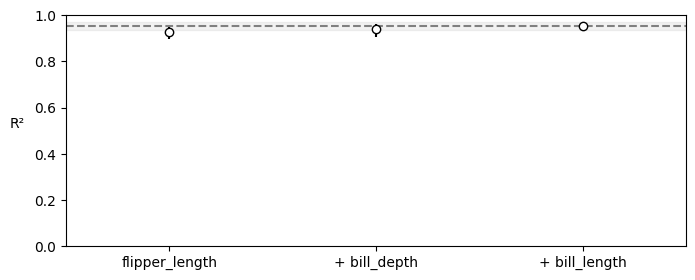

In [26]:
pmb.plot_variable_importance(vi_penguins)



---



**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

**Answer10:**

The PDPs show a good amount of information about our models. With these, we can see that flipper length has a good linear relationship with body weight/mass. Although, there might not be any correlation with bill depth and length :(.

A good thing to know though is the VI, the variable importance model, to know which variable is the most important. With this, we can see that flipper length is the most important. I feel like this makes sense if we were to look back at our other models, we can see that flipper length has a great linear relationship with body mass compared to the others that are visually flatter than flipper length. Flipper length is a great predictor in the end!



---

